In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
DATA_DIR = os.getcwd() + "/characters"
DATA_DIR

'/home/amogh/Documents/Study/MLDL/characters'

In [3]:
num_classes = 10
image_dimension = 32
batch_size = 64
nb_train_samples = 16000
nb_validation_samples = 4000
epochs = 20

In [4]:
simple_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
train_generator = simple_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(image_dimension, image_dimension),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True, subset="training")

valid_generator = simple_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(image_dimension, image_dimension),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False, subset="validation")

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [6]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(
    image_dimension, image_dimension, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [7]:
try:
    os.mkdir("devanagari_classifier")
except:
    pass

checkpoint = ModelCheckpoint(os.getcwd() + "/devanagari_classifier/devanagari_cnn_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

try:
    os.mkdir("devanagari_classifier/log_dir")
except:
    pass

tensorboard_callback = TensorBoard(
    log_dir='%s/devanagari_classifier/log_dir/devanagari_cnn_1' % os.getcwd(), histogram_freq=1)

callbacks = [earlystop, checkpoint, tensorboard_callback]

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=valid_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
249/250 [============================>.] - ETA: 0s - loss: 0.3475 - accuracy: 0.8946
Epoch 00001: val_loss improved from inf to 4.21491, saving model to /home/amogh/Documents/Study/MLDL/devanagari_classifier/devanagari_cnn_1.h5
250/250 [==============================] - 31s 123ms/step - loss: 0.3473 - accuracy: 0.8946 - val_loss: 4.2149 - val_accuracy: 0.2888
Epoch 2/20
249/250 [============================>.] - ETA: 0s - loss: 0.0607 - accuracy: 0.9814
Epoch 00002: val_loss improved from 4.21491 to 0.19056, saving model to /home/amogh/Documents/Study/MLDL/devanagari_classifier/devanagari_cnn_1.h5
250/250 [==============================] - 29s 118ms/step - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.1906 - val_accuracy: 0.9536
Epoch 3/20
249/250 [============================>.] - ETA: 0s - loss: 0.0388 - accuracy: 0.9883
Epoch 00003: val_loss improved from 0.19056 to 0.08904, saving model to /home/amogh/Documents/Study/MLDL/devanagari_classifier/devanagari_cnn_1.h5
250/250

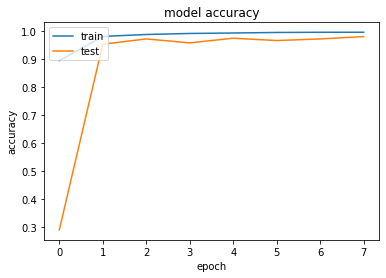

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

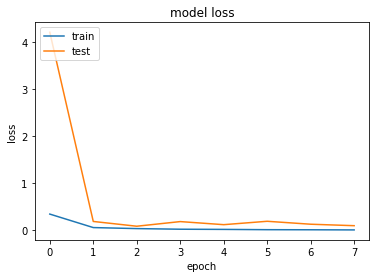

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
loaded_model = load_model(
    os.getcwd() + "/devanagari_classifier/devanagari_cnn_1.h5")

# Confution Matrix and Classification Report
Y_pred = loaded_model.predict_generator(
    valid_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

class_labels = {v: k for k, v in valid_generator.class_indices.items()}

print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(valid_generator.classes,
                            y_pred, target_names=target_names))

Confusion Matrix
[[397   0   0   1   1   0   0   0   1   0]
 [  0 388   0   0   0   0   0  12   0   0]
 [  0   0 392   3   1   0   1   0   0   3]
 [  0   0   1 399   0   0   0   0   0   0]
 [  0   0   0   0 400   0   0   0   0   0]
 [  0   3   0   0   0 394   0   3   0   0]
 [  0   0   0   4   0   0 389   0   7   0]
 [  0   6   0   4   2   9   3 367   0   9]
 [  2   3   0   0   9   0   1   3 381   1]
 [  0   0  11   0   5   0   0   0   0 384]]
Classification Report
                       precision    recall  f1-score   support

      character_01_ka       0.99      0.99      0.99       400
     character_06_cha       0.97      0.97      0.97       400
character_11_taamatar       0.97      0.98      0.98       400
    character_12_thaa       0.97      1.00      0.98       400
     character_13_daa       0.96      1.00      0.98       400
    character_15_adna       0.98      0.98      0.98       400
  character_16_tabala       0.99      0.97      0.98       400
      character_21_pa    

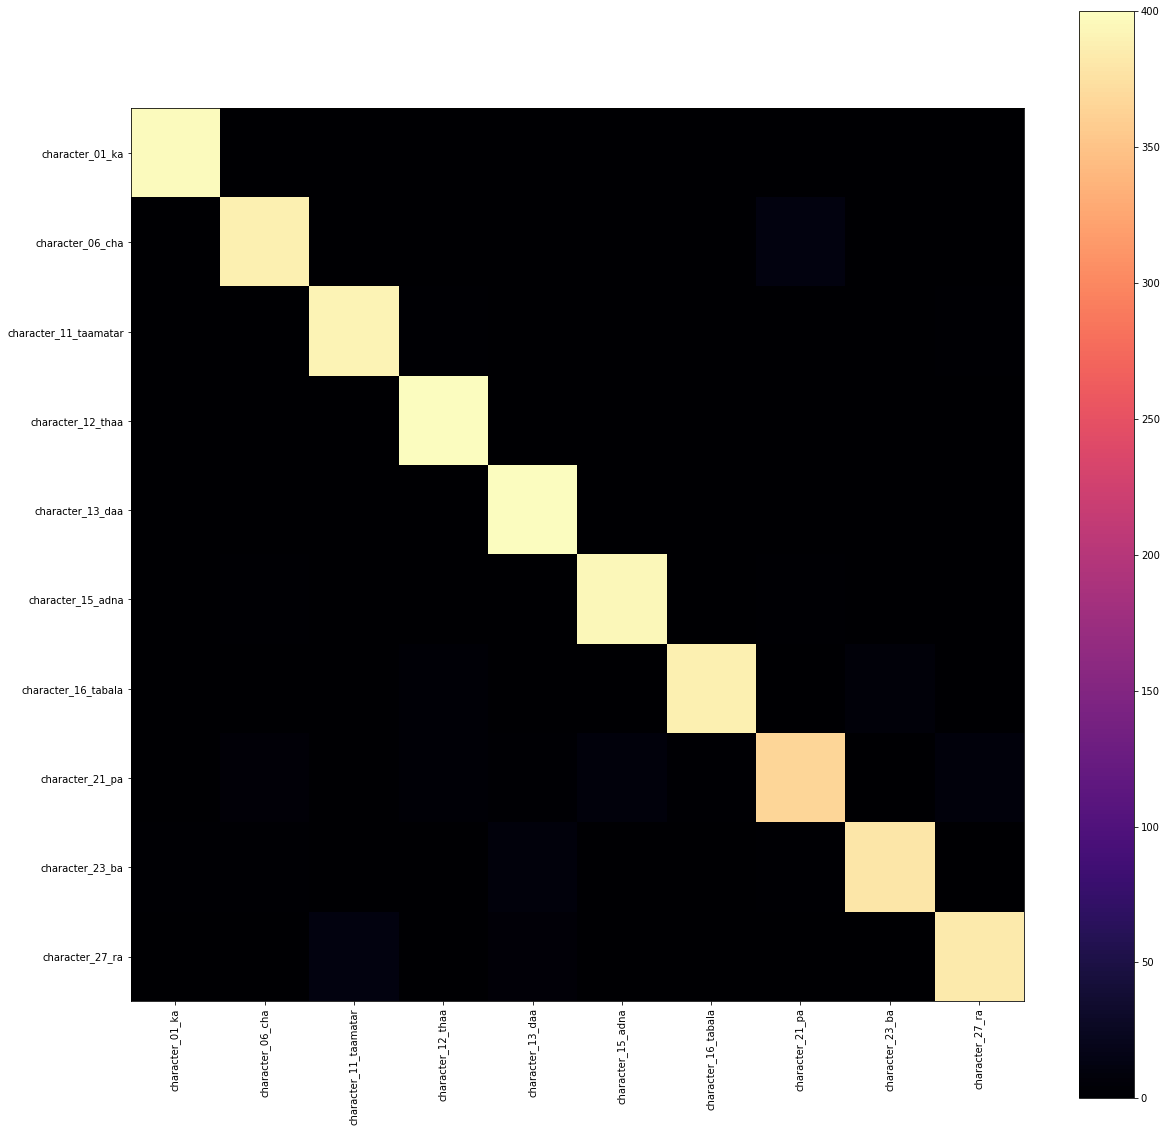

In [12]:
plt.figure(figsize=(20, 20))
cnf_matrix = confusion_matrix(valid_generator.classes, y_pred)
plt.imshow(cnf_matrix, interpolation='nearest', cmap="magma")
plt.colorbar()

classes = list(class_labels.values())

tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [13]:
loaded_model = load_model(
    os.getcwd() + "/devanagari_classifier/devanagari_cnn_1.h5")

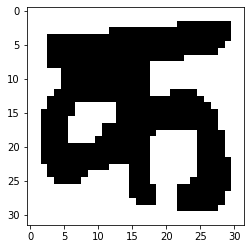

In [14]:
TEST_IMAGE = os.getcwd() + "/devanagari_classifier/testing_new/character_01_ka/0.png"
test = plt.imread(TEST_IMAGE)
plt.imshow(test, cmap='gray_r')

In [15]:
EVAL_DIR = os.getcwd() + "/devanagari_classifier/testing_new/"

In [16]:
eval_generator = simple_datagen.flow_from_directory(
    EVAL_DIR,
    target_size=(image_dimension, image_dimension),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 1000 images belonging to 10 classes.


In [17]:
loaded_model.evaluate(eval_generator)

16/16 [==============================] - 2s 97ms/step - loss: 1.2778 - accuracy: 0.8660


[1.277779778582044, 0.866]